# 네이버 뉴스 crawling으로 보는, 제품에 대한 관심도와 실제 판매량의 상관관계 찾기!

## Term_Project        2016100938 산업경영공학과 김수영

## (1) 주제 선정 이유
'무관심보다는 악플이 낫다'라는 말이 있습니다. 사람들의 기억 속에서 완전히 잊혀지는 무관심보다는 어떤 형태로든지 간에 관심을 받는 편이 더 낫다는 의미입니다. 저는 이 말은  SNS 속 인간관계에서만 통하는 말이 아니라, 디지털 제품에 있어서도 통하는 말이라고 생각합니다.

매 번 '혁신은 없었다'는 제목으로 시작되는 아이폰의 신제품 관련 기사가 그 예시 중 하나라 생각합니다.  사람들은 새로운 변화가 없는 부분을 지적하고 비난하면서도, 그 비난은 관심과 판매량으로 이어지는지 되려 판매량이 더 올랐다는 기사를 보곤 했습니다. 이런 부분을 보고 의구심을 느낀 저는 네이버 모바일 웹 사이트에서 신제품 발표 전날~발표 후 4일까지 총 5일간 제품 키워드가 제목에 들어간 인기 기사의 조회수를 crawling해서 제품에 대한 관심도(조회수)와 실제 제품과의 판매량, 그리고 제품과 제품 간의 비교를 수행하고자 합니다. 

## (2) 가설 정의
신제품 발표 D-1 ~D+4까지의 관련 기사(호의적인 기사, 부정적인 기사 관계없이 신제품의 키워드가 제목에 들어가기만 하면 됨)의 조회수와 실제 판매량은 비례한다. 

## (3) 인터넷을 통한 데이터 획득
분석의 효율성을 위해, 지나치게 많은 정보가 담긴 PC버전 웹 사이트가 아닌 모바일 버전 네이버 뉴스 게시판을 이용하였습니다.

필요한 정보인 기사 제목과 조회수 정보는 모바일 사이트도 그대로 담고 있었습니다.
(https://m.news.naver.com/rankingList.nhn?sid1=105&date=20190912)
해당 사이트는 IT 카테고리의 기사 중 많이 읽힌 기사 30개의 제목과 조회수를 담고 있는 페이지입니다.

 우선 이 곳에서 BeautifulSoup 라이브러리를 이용하여 html 소스를 가져오고, 이를 parsing을 통해 파이썬 객체로 변환하였습니다.
 
그리고 신제품 발표 전날~발표 후 4일까지 총 5일의 데이터를 수집할 것이기 때문에 while문, 그리고 int형 변수인 제품명_release_date 를 선언하여 반복을 통해 5일간의 html 소스를 수집해 올 수 있도록 만들었습니다.

2018년 9월 13일에 발표된 아이폰 XS 모델을 예로 들면 while문의 조건을 4일 후인 '2018년 9월 16일보다 변수가 작을 때'로 두고, 변수인 phone1_release_date를 20180912 로 두고 20180916이 될 때까지 1씩 증가시키며 소스를 받아오는 식입니다. 

## (4) 분석을 위한 데이터 가공

분석을 위해 가져온 Raw Data에서 우선은 기사의 제목, 순위 그리고 조회수만 가져오고자 하였습니다.
해당 페이지에서는 그날 가장 많이 읽힌 30개의 기사 미리보기를 저장하고 있습니다.
먼저 이 미리보기의 selector를 copy해 보았습니다.
#ct > div.ranking_news > ul > li:nth-child(7) > a > div.commonlist_tx > div.commonlist_tx_headline
이 각각의 미리보기는 제목, 순위, 조회수 그리고 관련 사진을 첨부하고 있으며 'ul' 내부에서 class명이 'commonlist'인 소스 내부에 이 내용들이 저장되어 있었습니다. 

우선 이 부분을 ul=soup.find("ul",{"class":"commonlist"}) 를 통해 추려냅니다.
그리고 ul 내부에서 'li' 내부의 소스를 lists=ul.findAll("li")를 통해 가져옵니다.
이제 이 추려낸 소스에서 조회수와 제목만을 다시 뽑아내기 위해

 while i<=30:
            link=soup.select("#ct > div.ranking_news > ul > li:nth-child("+str(i)+") > a")
            
            for li in link:              
 
 기사 순위를 지정해주는 div.ranking_news에서 순위를 while문을 통해 1위부터 30위까지 바꾸어가며 조회수와 제목이 담긴 소스를 크롤링합니다.
 
이 때 while문 내부에서는 preview라는 변수를 선언하여, preview=li.text.strip().split('조회수')를 통해 li 중에서 텍스트인 부분만 추출한 후 strip, split을 통해 뉴스 기사 제목이 담긴 preview[0], 조회수가 담긴 preview[1]로 분할합니다. 
뉴스 기사 제목이 담긴 preview[0]에서 .find를 통해 원하는 키워드(제품)가 담긴 기사를 찾아내고 그 기사 조회수의 일일 합을 최종적으로 계산합니다.


## (5) 분석 결과 도출

pandas, matplotlib를 import하여 데이터를 수치화 및 시각화하였습니다.
먼저 작년에 나온 아이폰xs 시리즈와 올해 나온 갤럭시s10 시리즈의 발표 전후 5일간의 관심도를 비교해 보았습니다.

   iPhone_XS  Galaxy_S10
1      95933      233176
2     552534     1833393
3     206712      374885
4     164379      228595
5      27834      127374
AxesSubplot(0.125,0.125;0.775x0.755)


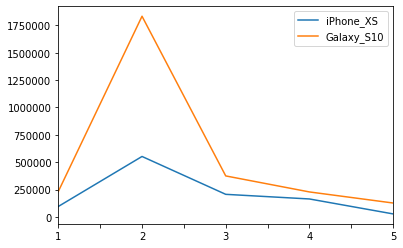

In [2]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

class Research:
    phone1_release_date=0
    phone2_release_date=0
    phone1_name=''
    phone2_name=''
    phone1_searchkeyword=''
    phone2_searchkeyword=''
    def __init__(self,_phone1_release_date,_phone2_release_date,_phone1_name,_phone2_name,_phone1_searchkeyword,_phone2_searchkeyword):
        self.phone1_release_date=_phone1_release_date
        self.phone2_release_date=_phone2_release_date
        self.phone1_name=_phone1_name
        self.phone2_name=_phone2_name
        self.phone1_searchkeyword=_phone1_searchkeyword
        self.phone2_searchkeyword=_phone2_searchkeyword
    def visualization(self):
       
        i=0
        data=pd.DataFrame(0,columns=[self.phone1_name,self.phone2_name],index=['1','2','3','4','5'])
        aa=0
        dateafter1=self.phone1_release_date+4
        dateafter2=self.phone2_release_date+4
        while (self.phone1_release_date <=dateafter1 ) :

                link = 'https://m.news.naver.com/rankingList.nhn?sid1=105&date='
                s1=link+str(self.phone1_release_date)
                html=urlopen(s1)
                soup=BeautifulSoup(html,"html.parser")
                ul=soup.find("ul",{"class":"commonlist"})
                lists=ul.findAll("li")
                i=0
                
                sum=0

                while i<=30:
                    link=soup.select("#ct > div.ranking_news > ul > li:nth-child("+str(i)+") > a")

                    for li in link:              

                        preview=li.text.strip().split('조회수')
                        if preview[0].find(self.phone1_searchkeyword)!= -1:
                            #print(preview[0])     

                            sum+=int(preview[1].replace(',',''))
                           # print(preview[1].replace(',',''))
                           # print('TOP NEWS 조회수의 합:',sum)
                    i+=1
                self.phone1_release_date+=1
                aa+=1
                data.loc[str(aa),self.phone1_name]=sum


        
        i=0

        aa=0
        while (self.phone2_release_date <= dateafter2) :

                link = 'https://m.news.naver.com/rankingList.nhn?sid1=105&date='
                s2=link+str(self.phone2_release_date)
                html=urlopen(s2)
                soup=BeautifulSoup(html,"html.parser")
                ul=soup.find("ul",{"class":"commonlist"})
                lists=ul.findAll("li")
                i=0
              
                sum=0

                while i<=30:
                    link=soup.select("#ct > div.ranking_news > ul > li:nth-child("+str(i)+") > a")

                    for li in link:              

                        preview=li.text.strip().split('조회수')
                        if preview[0].find(self.phone2_searchkeyword)!= -1:
                          #  print(preview[0])

                            sum+=int(preview[1].replace(',',''))
                           # print(preview[1].replace(',',''))
                          #  print('TOP NEWS 조회수의 합:',sum)
                    i+=1
                self.phone2_release_date+=1
                aa+=1
                data.loc[str(aa),self.phone2_name]=sum

        print(data)
        print(data.plot.line())

         #아이폰XS 발표일,갤럭시s10 발표일(한국시간),핸드폰1 이름, 핸드폰2 이름, 핸드폰1 검색 키워드, 핸드폰2 검색 키워드
iPhone_XS_VS_Galaxy_S10=Research(20180912,20190220,'iPhone_XS','Galaxy_S10','아이폰','갤럭시')
iPhone_XS_VS_Galaxy_S10.visualization()





위와 같이 관심도를 수치화시킨 결과, 갤럭시s10에 대한 관심이 아이폰 XS 시리즈에 대한 관심보다 약 세 배 가량 많음을 확인할 수 있습니다.
실제 판매량도 이를 따라가는 지 확인해 보았습니다.
우선 국내 판매량 데이터는 '애틀러스리서치'라는 회사에서 독점적으로 가지고 있어서, 실제 데이터를 구하기 어려웠고 뉴스 기사 등을 통해 추정하였습니다.

우선 아이폰 시리즈(XS, XR, XS MAX)의 출시 초기 14일 간 누적 판매량은 25만 대입니다.
http://www.startuptoday.co.kr/news/articleView.html?idxno=21024

그리고 갤럭시 시리즈의 출시 후 47일간 누적 판매량은 100만대입니다.
https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=105&oid=015&aid=0004132034

판매량은 일반적으로 출시 초기 반짝 팔린 다음 서서히 감소하는 형태를 보입니다. 따라서 아이폰의 47일간 판매량이 단순 비례곱(25만 X 47 / 14 = 83.9) 을 통해 83만대라 생각해도 갤럭시와 차이가 있는데, 실제 판매량은 그 이상으로 벌어질 것이라 예상합니다.


다음으로 LG전자의 최신 스마트폰인 v50과 갤럭시s10의 관심도를 비교해 보았습니다.


   LG_V50  Galaxy_S10
1   23482      233176
2  284462     1833393
3   44680      374885
4   13577      228595
5       0      127374
AxesSubplot(0.125,0.125;0.775x0.755)


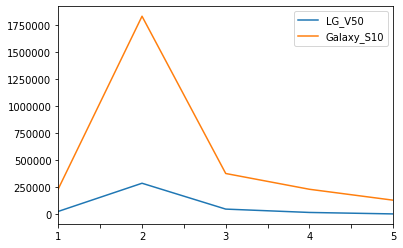

In [15]:
 #LG V50 발표일,갤럭시s10 발표일(한국시간),핸드폰1 이름, 핸드폰2 이름, 핸드폰1 검색 키워드, 핸드폰2 검색 키워드
LGV50_VS_Galaxy_S10=Research(20190224,20190220,'LG_V50','Galaxy_S10','V50','갤럭시')
LGV50_VS_Galaxy_S10.visualization()

이번에는 약 6배 가량의 차이를 보이고 있습니다. 실제 판매량도 그런지 확인해 보았습니다.

v50의 100일간 누적 판매량은 약 50만 대,50일간 약 30만 대입니다.https://www.hankyung.com/it/article/2019081567051

47일간 누적 100만대가 팔린 갤럭시 s10 시리즈와 비교했을 때 약 3.5배가량의 판매량 차이가 있습니다.

비록 6배만큼의 수치는 아니지만, 어느 정도의 판매량 차이가 있는 것은 사실입니다.

마지막으로 아이폰 xs와 올해 새로 출시된 아이폰 11을 비교해 보았습니다.

   iPhone_XS  iPhone_11
1      95933      39065
2     552534    1561428
3     206712     400602
4     164379     160732
5      27834     111612
AxesSubplot(0.125,0.125;0.775x0.755)


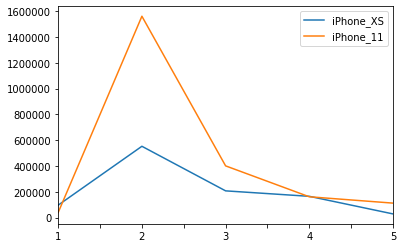

In [18]:
iPhone_XS_VS_iPhone_11=Research(20180912,20190910,'iPhone_XS','iPhone_11','아이폰','아이폰')
iPhone_XS_VS_iPhone_11.visualization()

이번에는 아이폰 11에 대한 관심이 아이폰XS에 대한 관심보다 약 세 배 가량 많음을 알 수 있습니다.
아직 아이폰 11이 국내에 출시되지는 않았지만, 아이폰XS보다는 더 잘 팔릴 것임을 예측할 수 있는 부분입니다.


*최종본 추가-http://www.zdnet.co.kr/view/?no=20191028142942

그리고 실제로 아이폰11의 판매량은 아이폰XS 시리즈를 넘어섰습니다!


" 아이폰11 시리즈의 개통량은 출시 첫날인 지난 25일에 13만~14만대를 기록한 것으로 나타났다. 이는 지난해 11월 출시된 전작 아이폰XS 시리즈의 개통량(10만대 수준)과 비교해 30% 이상 늘어난 수준이다."  -  ZDNet Korea, '초반 흥행 성공한 아이폰11, LG 넘고 삼성 쫓나 ' "



## (6) 결론
앞의 데이터 시각화를 통해, 제품 관련 기사 조회수로 본 '관심도'와 실제 판매량 사이에는 정확하지는 않지만 어느 정도의 연관성이 있다고 결론지었습니다. 이를 통해 출시되지 않은 신제품의 판매량도 가늠해 볼 수 있겠습니다. 다만 수집한 기사가 어떤 내용을 담고 있는지 모른 채 단순히 제목에 해당하는 제품 키워드를 담은 기사면 모두 수집했고, 따라서 그 기사에 관한 관심이 좋은 관심인지 안 좋은 관심인지는 알지 못합니다. 따라서 추후에 기사가 제품에 긍정적인지 여부를 따져 가며 세분화해서 분류하는 등의 작업을 추가하면 모델의 정확도를 훨씬 높여나갈 수 있을 것 같습니다. 



## (7) 참고문헌

Beautiful soup로 크롤링하기,Jungwoon Blog
https://jungwoon.github.io/python/crawling/2018/04/12/Crawling-2/

requests와 BeautifulSoup으로 웹 크롤러 만들기
https://beomi.github.io/gb-crawling/posts/2017-01-20-HowToMakeWebCrawler.html

점프 투 파이썬
https://wikidocs.net/book/1

한 입에 크롤링
https://www.youtube.com/watch?v=PNpS2Id8qyc&list=PLAdQRRy4vtQREMg7H7-zFPSOYS6xF1gIL

파이썬으로 배우는 알고리즘 트레이딩
https://wikidocs.net/book/110
